In [34]:
import pandas as pd
import numpy as np


In [35]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
# Handling missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [38]:
# Dropping unnecessary columns
titanic_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [39]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [40]:
# Encoding categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'])

In [41]:
titanic_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,False,True,False,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,True,False,True,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,True,False,False,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,True,False,False,False,True
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,False,True,False,False,True


In [42]:
# Feature engineering
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [43]:
titanic_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Title
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,False,True,False,False,True,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,True,False,True,False,False,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,True,False,False,False,True,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,True,False,False,False,True,2,Mrs
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,False,True,False,False,True,1,Mr


In [44]:
# Drop the Name column after extracting Title
titanic_df.drop('Name', axis=1, inplace=True)

In [45]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Title
0,0,3,22.0,1,0,7.2500,False,True,False,False,True,2,Mr
1,1,1,38.0,1,0,71.2833,True,False,True,False,False,2,Mrs
2,1,3,26.0,0,0,7.9250,True,False,False,False,True,1,Miss
3,1,1,35.0,1,0,53.1000,True,False,False,False,True,2,Mrs
4,0,3,35.0,0,0,8.0500,False,True,False,False,True,1,Mr


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

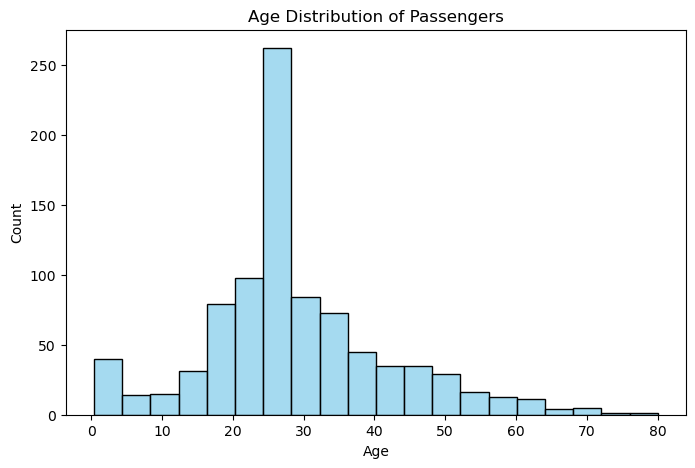

In [47]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(titanic_df['Age'].dropna(), bins=20, kde=False, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

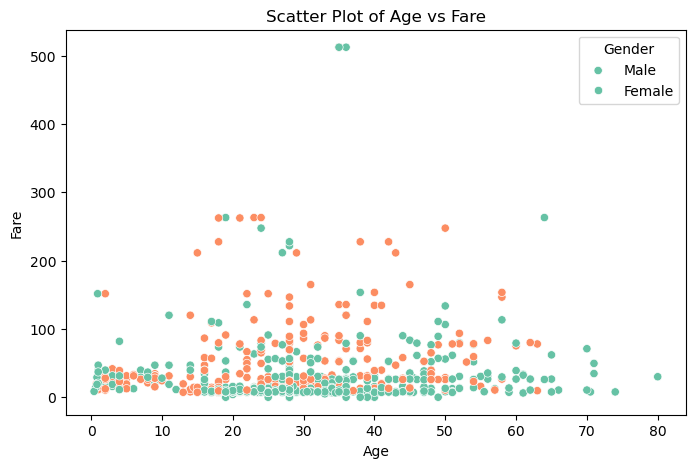

In [48]:
# Scatter plot of Age vs Fare
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', data=titanic_df, hue='Sex_female', palette='Set2')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.show()

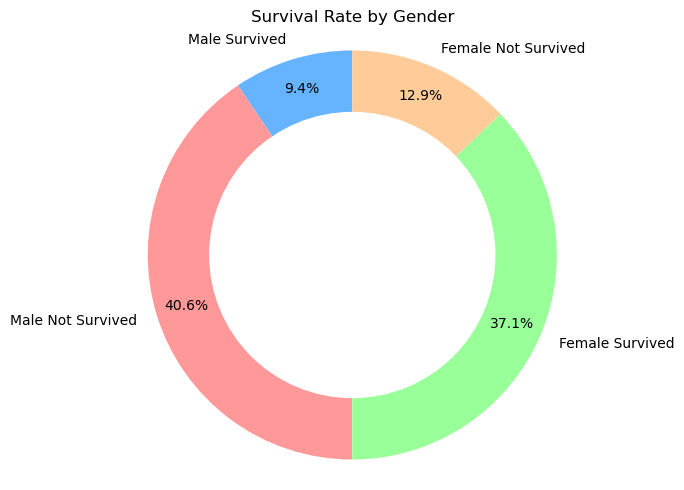

In [49]:
# Calculate survival rate by gender
survival_by_gender = titanic_df.groupby(['Sex_male', 'Sex_female'])['Survived'].mean().reset_index()

# Prepare data for the donut chart
labels = ['Male Survived', 'Male Not Survived', 'Female Survived', 'Female Not Survived']
sizes = [
    survival_by_gender[(survival_by_gender['Sex_male'] == 1)]['Survived'].values[0],
    1 - survival_by_gender[(survival_by_gender['Sex_male'] == 1)]['Survived'].values[0],
    survival_by_gender[(survival_by_gender['Sex_female'] == 1)]['Survived'].values[0],
    1 - survival_by_gender[(survival_by_gender['Sex_female'] == 1)]['Survived'].values[0]
]
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
 
fig, ax = plt.subplots()
ax.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.title('Survival Rate by Gender')
plt.show()